<a href="https://colab.research.google.com/github/igcampos/MBrito-Imobiliaria/blob/master/MBrito_Imobiliaria_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Projeto MBrito Imobiliária 

## Entendimento do Negócio
Será criado uma simulação de negócio onde a empresa MBrito Imobiliária está querendo resolver através da análise de dados mercadológicas. 

Os dados foram retirados do kaggle para salientar a simulação de negócio. 

https://www.kaggle.com/harlfoxem/housesalesprediction



**INTRODUÇÃO**

A Mbrito imobiliária está em busca de novas oportunidades de negócios, dentre elas a aquisição de novos empreendimentos a baixos custos para reformar e em seguida vender a preços mais altos e obter bons rendimentos com o negócio. 
Para fazer isso a empresa deve analisar o mercado em busca de oportunidades para lucrar, portanto as seguintes perguntas são necessárias. 

1. **Quais casas o CEO da MBrito Imobiliária deveria comprar e por qual preço de compra?**

*Essa pergunta é importante, porque é nesse momento que a empresa obtém o lucro. Portanto é necessário identificar oportunidades de negócios.*  
2. **Uma vez a casa em posse da empresa, qual o melhor momento para vendê-las e qual seria o preço da venda?**

*O CEO está querendo identificar a maior chance de obter altos rendimentos, logo é necessário identificar o preço que cada imóvel será vendido e estudar se o mercado imobiliário está propicio para venda.* 
3. **A MBrito Imobiliária deveria fazer uma reforma para aumentar o preço da venda?Quais seriam as sugestões de mudanças? Qual o incremento no preço dado por cada opção de reforma?**

*É nesse momento que avaliamos se o imóvel adquirido necessita de reformas para alavancar o preço final.* 


In [ ]:
#Montando o ambiente colab
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import matplotlib.ticker as mtick

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


### Overview dos dados

In [ ]:
df_mbrito = pd.read_csv('/content/drive/My Drive/Colab/kc_house_data.csv')

In [ ]:
df_mbrito.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


**Análise das colunas**
* **id**: coluna com dados únicos para identificar cada imóvel (chave primária);
* **date**: coluna com as datas de venda dos imóveis;
* **price**: valores dos imóveis, variável target;
* **bedrooms**: número de quartos em cada imóvel;
* **bathrooms**: número de banheiros em cada imóvel, onde para cada lavabo adiciona .5;
* **sqft_living**: a área construída em pés por quadrado;
* **sqft_lot**: a área total da residência;
* **floors**: o número de pavimentos da residência;
* **waterfront**: coluna com valores binários dizendo se a propriedade tem vista para o mar;
* **view**: coluna com valores de 0 a 4 mostrando quão bonita é a vista da propriedade;
* **condition**: coluna com números de 1 a 5 com as condições dos imóveis;
* **grade**: coluna com valores de qualidade do imóvel, sendo 1 a 3 ruim, 7 médio e 11-13 alta qualidade;
* **sqft_above**: área construída do imóvel dos andares superiores;
* **sqft_basement**: área construída do imóvel que é abaixo do nível da terra;
* **yr_built**: Ano de construção do imóvel;
* **yr_renovated**: Ano que o imóvel foi reformado;
* **zipcode**: código postal do imóvel;
* **lat**: latitude do imóvel;
* **long**: longitude do imóvel;
* **sqft_living15**: área construída das 15 propriedades mais próximas;
* **sqft_lot15**: área total das 15 propriedades mais próximas;


In [ ]:
df_mbrito.info()

Devemos transformar a coluna de date de object para datetime e criar duas novas colunas separando em ano e mês. Outra coluna que deve ser criada é a se o imóvel foi renovado ou não, e deve ser binária.

In [ ]:
df_mbrito.nunique()

In [ ]:
df_mbrito.shape[0] - 21436

Quando chamamos a função nunique() a coluna de id que deve ter dados únicos não tem a mesma quantidade de linhas, ou seja em 177 linhas deve existir dados duplicados.

In [ ]:
df_mbrito.describe()

Na análise descritiva dos dados numéricos, temos que o número mínimo de quartos e banheiro é igual a zero, devemos analisar se essa propriedade é comercial ou um erro na ingestão do banco de dados.

Outra informação importante é que o ano de construção de certos imóveis mais novos são do ano de 2015, além do ano de reforma que também é de 2015. 

A última informação que retiramos da análise descritiva é que a quantidade máxima de pavimentos é de 3.5, onde o .5 pode ser por que o imóvel tem porão. 

**Plotando a distribuição das variáveis**

In [ ]:
plt.style.use('seaborn')

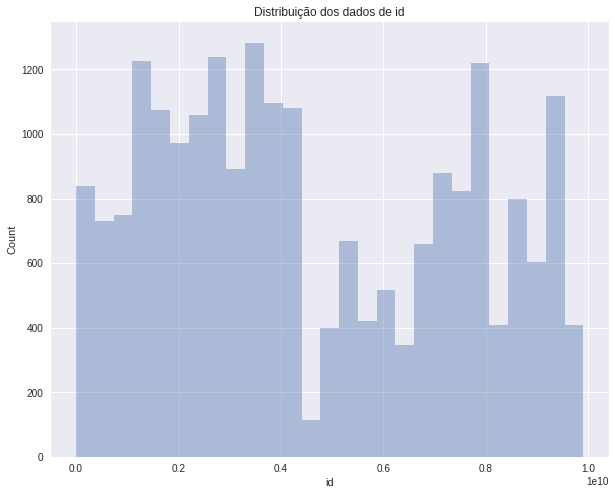

In [ ]:
#plotando a distribuição da variável id
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.id, kde=False)

plt.title('Distribuição dos dados de id')
plt.ylabel('Count')
plt.show()

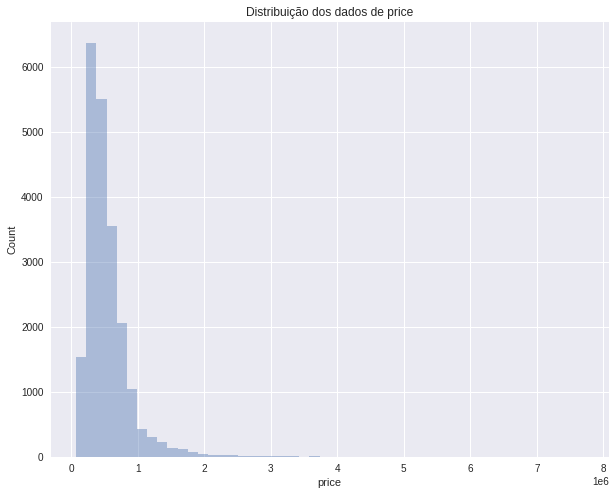

In [ ]:
#plotando a distribuição da variável price
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.price, kde=False)

plt.title('Distribuição dos dados de price')
plt.ylabel('Count')
plt.show()

Pela distribuição o grande maioria dos valores dos imóveis estão entre 75 000.00 a 1 000 000.00 com média entre 540 088.00 e o desvio padrão de 367 127.00.

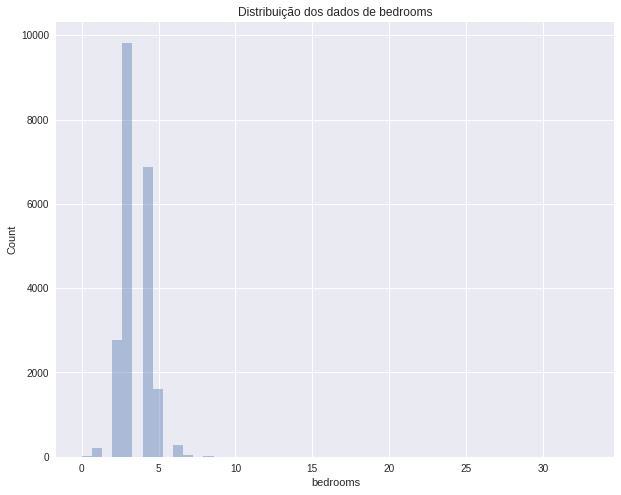

In [ ]:
#plotando a distribuição da variável bedrooms
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.bedrooms, kde=False)

plt.title('Distribuição dos dados de bedrooms')
plt.ylabel('Count')
plt.show()

A maioria dos imóveis tem quartos entre 0 e 5, com média de 3.37 e desvio padrão de 0.93.

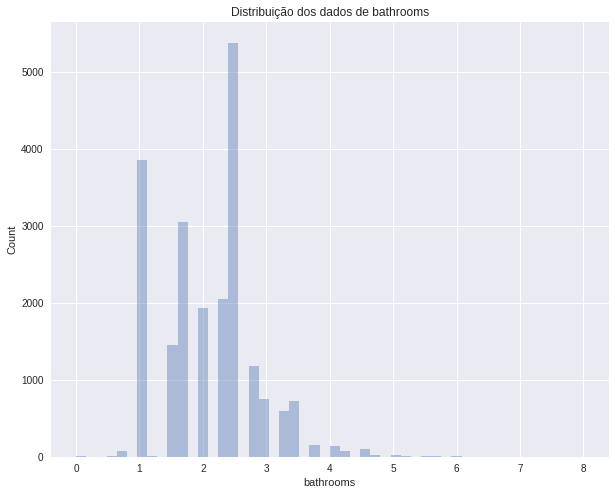

In [ ]:
#plotando a distribuição da variável bathrooms 
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.bathrooms, kde=False)

plt.title('Distribuição dos dados de bathrooms')
plt.ylabel('Count')
plt.show()

A maioria dos imóveis tem 1 a 3 banheiros com a média sendo 2.11 e o desvio padrão 0.77.  

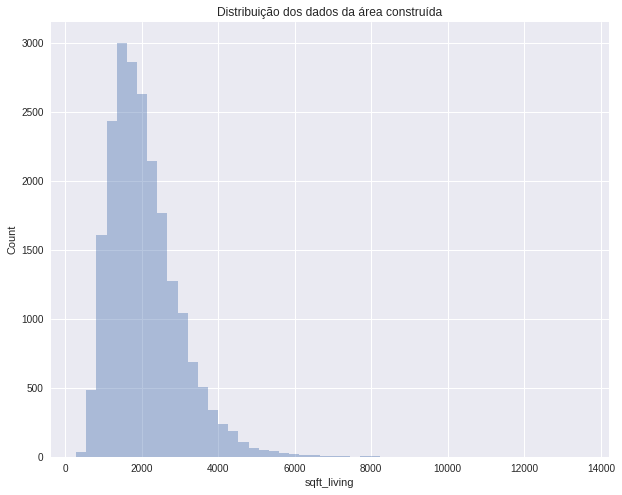

In [ ]:
#plotando a distribuição da variável sqft_living
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_living, kde=False)

plt.title('Distribuição dos dados da área construída')
plt.ylabel('Count')
plt.show()

Pelo gráfico podemos notar que a maioria dos imóveis tem área construída entre 290 sqft a 6000 sqft com média sendo 2079.89 sqft e desvio padrão de 918.44 sqft.

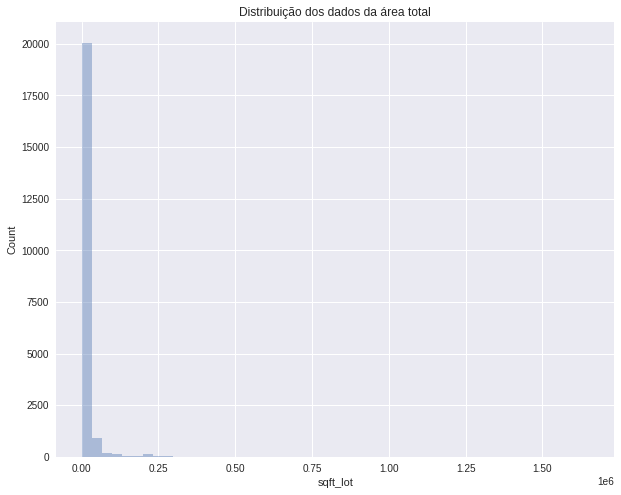

In [ ]:
#plotando a distribuição da variável sqft_lot
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_lot, kde=False)

plt.title('Distribuição dos dados da área total')
plt.ylabel('Count')
plt.show()

Pelo gráfico é possivel observar que a maioria da área construída esta em um bin, com média de 15 106.97 sqft e desvio padrão de 41 420.51 sqft. 

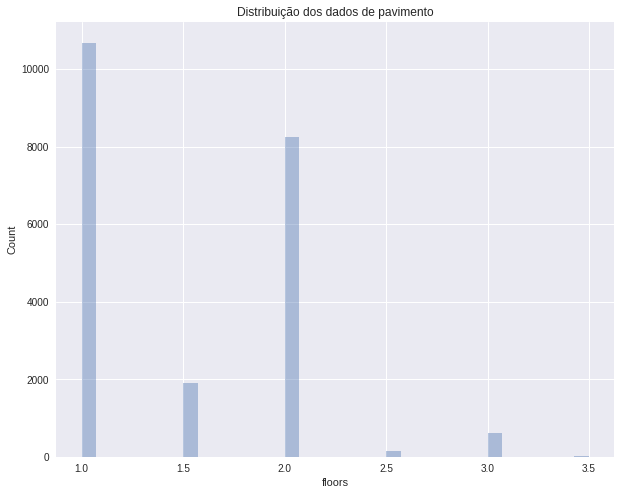

In [ ]:
#plotando a distribuição da variável floors
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.floors, kde=False)

plt.title('Distribuição dos dados de pavimento')
plt.ylabel('Count')
plt.show()

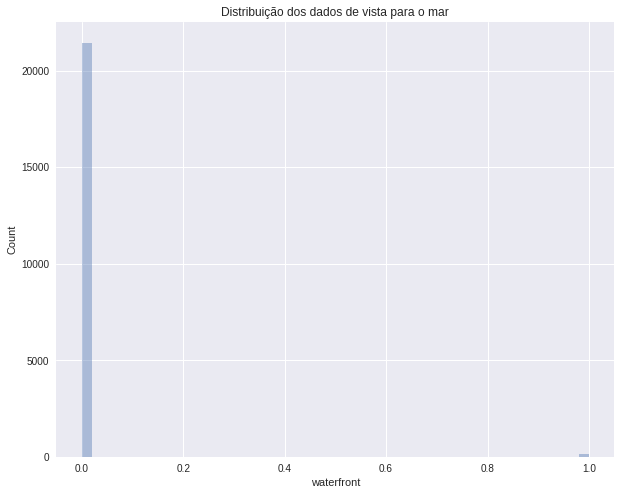

In [ ]:
#plotando a distribuição da variável waterfront
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.waterfront, kde=False)

plt.title('Distribuição dos dados de vista para o mar')
plt.ylabel('Count')
plt.show()

Por esse gráfico podemos notar que a grande maioria dos imóveis vendidos não tinham vista para o mar.

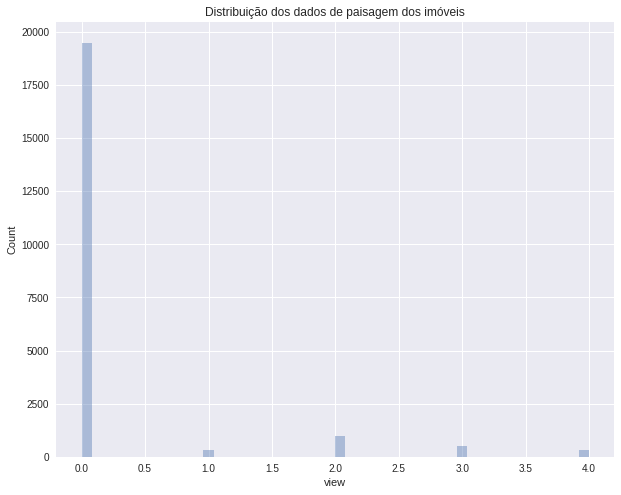

In [ ]:
#plotando a distribuição da variável view
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.view, kde=False)

plt.title('Distribuição dos dados de paisagem dos imóveis')
plt.ylabel('Count')
plt.show()

Como no gráfico anterior é possivel notar que a maioria dos imóveis tem uma classificação ruim a cerca da paisagem dos imóveis.  

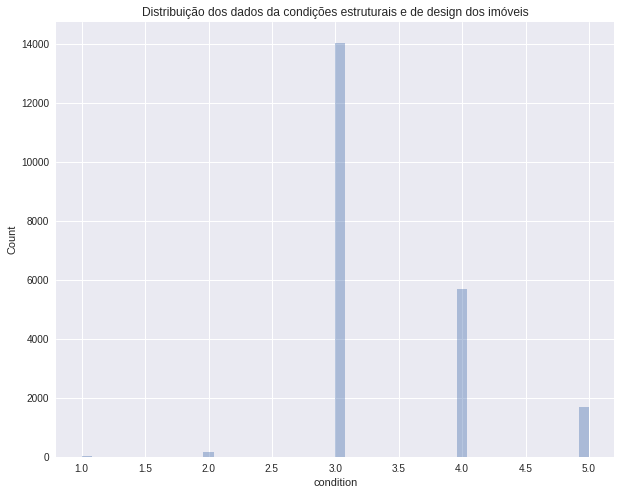

In [ ]:
#plotando a distribuição da variável condition
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.condition, kde=False)

plt.title('Distribuição dos dados da condições estruturais e de design dos imóveis')
plt.ylabel('Count')
plt.show()

A maioria dos imóveis tem classificação de 3 com desvio padrão de 0.650743.

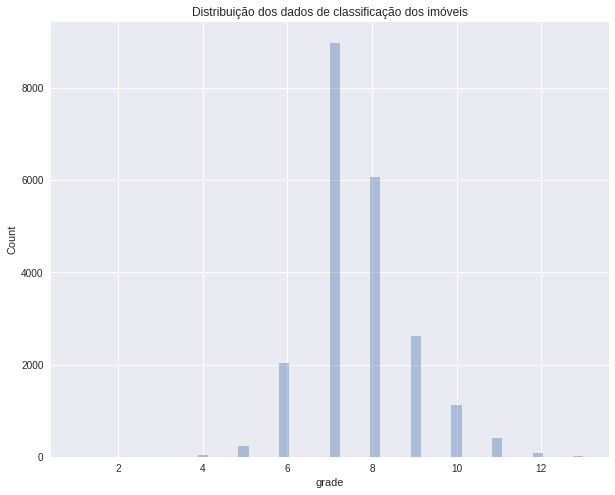

In [ ]:
#plotando a distribuição da variável grade
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.grade, kde=False)

plt.title('Distribuição dos dados de classificação dos imóveis')
plt.ylabel('Count')
plt.show()

Pelo gráfico podemos ver que a média de classificação dos imóveis está entre 7 e 8. 

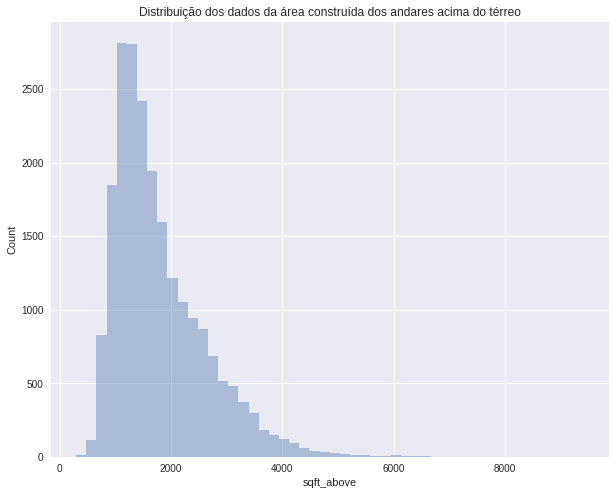

In [ ]:
#plotando a distribuição da variável sqft_above
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_above, kde=False)

plt.title('Distribuição dos dados da área construída dos andares acima do térreo')
plt.ylabel('Count')
plt.show()

Pelo gráfico a área construída está entre 290 sqft e 4 000 sqft.

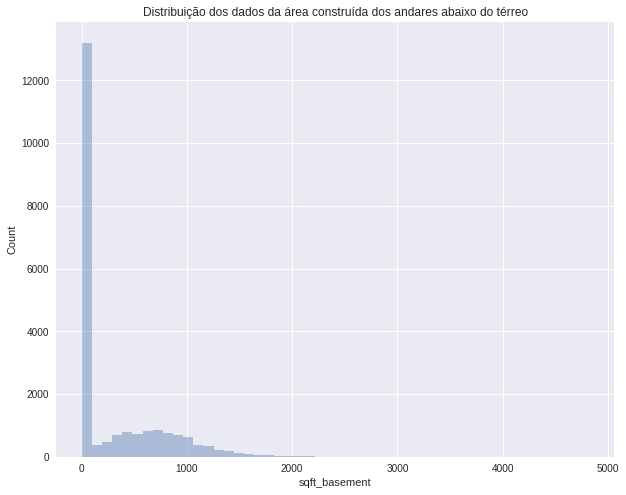

In [ ]:
#plotando a distribuição da variável sqft_basement
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_basement, kde=False)

plt.title('Distribuição dos dados da área construída dos andares abaixo do térreo')
plt.ylabel('Count')
plt.show()

Pelo gráfico pode se notar que a maioria dos imóveis não tem andar abaixo do térreo, mas quando tem a área construída fica em média 291.50 sqft e desvio padrão de 442.57 sqft.

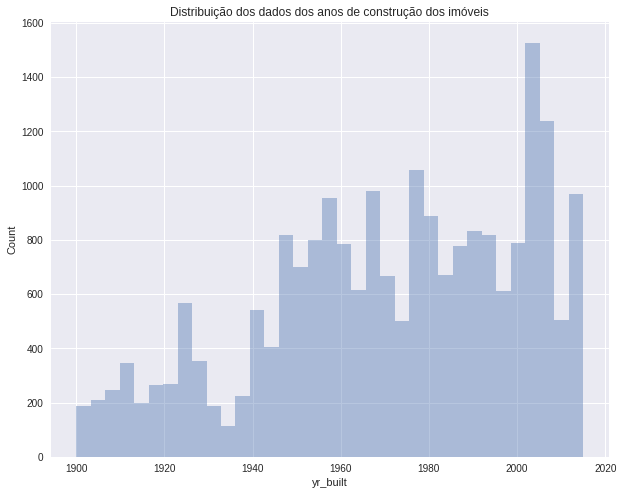

In [ ]:
#plotando a distribuição da variável yr_built
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.yr_built, kde=False)

plt.title('Distribuição dos dados dos anos de construção dos imóveis')
plt.ylabel('Count')
plt.show()

Podemos notar que as idades dos imóveis estão bastantes distribuídas entre 1900 e 2015. E a média dos anos de construção entre os imóves é de 1971.

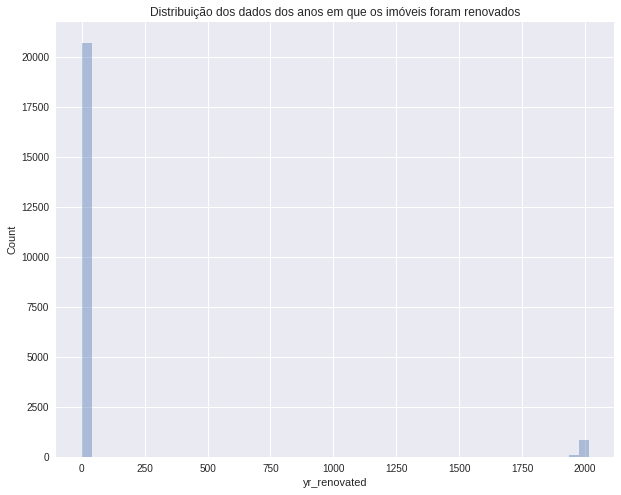

In [ ]:
#plotando a distribuição da variável yr_renovated
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.yr_renovated, kde=False)

plt.title('Distribuição dos dados dos anos em que os imóveis foram renovados')
plt.ylabel('Count')
plt.show()

Pelo gráfico a grande maioria não fez nenhum tipo de reforma nas propriedades.

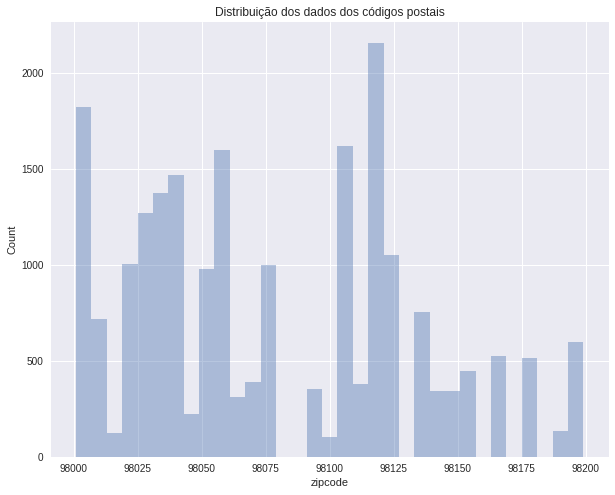

In [ ]:
#plotando a distribuição da variável zipcode
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.zipcode, kde=False)

plt.title('Distribuição dos dados dos códigos postais')
plt.ylabel('Count')
plt.show()

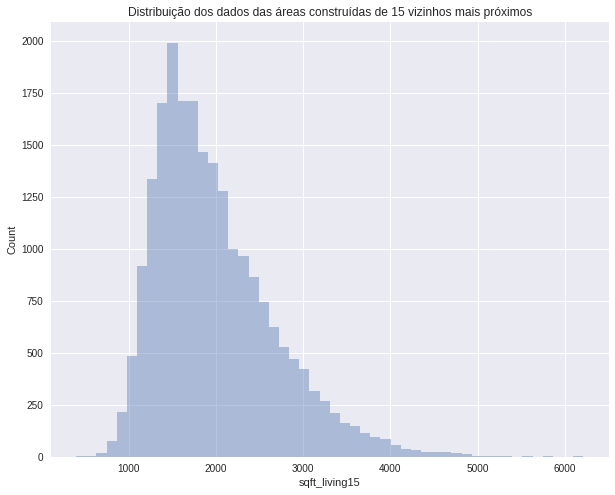

In [ ]:
#plotando a distribuição da variável sqft_living15
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_living15, kde=False)

plt.title('Distribuição dos dados das áreas construídas de 15 vizinhos mais próximos')
plt.ylabel('Count')
plt.show()

Pelo gráfico a concentração de áreas construídas dos 15 vizinhos fica entre 1 000 sqft e 4 000 sqft

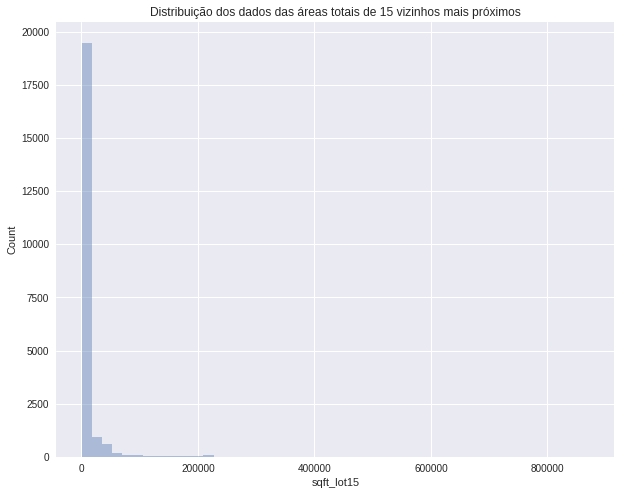

In [ ]:
#plotando a distribuição da variável sqft_lot15
plt.figure(figsize=(10,8)) 
sns.distplot(df_mbrito.sqft_lot15, kde=False)

plt.title('Distribuição dos dados das áreas totais de 15 vizinhos mais próximos')
plt.ylabel('Count')
plt.show()

### Preparação dos Dados

In [ ]:
df_mbrito.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [ ]:
renovated = []
for i in df_mbrito.yr_renovated:
  if i == 0:
    renovated.append(0)
  else:
    renovated.append(1)



In [ ]:
# Criando uma nova coluna binária se o imóvel foi renovado ou não
df_mbrito['renovated'] = renovated
df_mbrito.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0


In [ ]:
#modificando a coluna de date de object para datetime
df_mbrito['date'] = pd.to_datetime(df_mbrito['date'])

In [ ]:
#fazendo novas duas colunas separando a coluna já pré-existente date
#as duas novas colunas são ano e mês
df_mbrito['year'] = df_mbrito['date'].dt.year
df_mbrito['month'] = df_mbrito['date'].dt.month

In [ ]:
df_mbrito.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,10
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,12
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,2
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,12
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,2


In [ ]:
resale = df_mbrito[df_mbrito['id'].duplicated()].id
resale

94       6021501535
314      4139480200
325      7520000520
346      3969300030
372      2231500030
            ...    
20181    7853400250
20613    2724049222
20670    8564860270
20780    6300000226
21581    7853420110
Name: id, Length: 177, dtype: int64

In [ ]:
df_mbrito.loc[df_mbrito['id']==6300000226]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month
20779,6300000226,2014-06-26,240000.0,4,1.0,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,0,2014,6
20780,6300000226,2015-05-04,380000.0,4,1.0,1200,2171,1.5,0,0,3,7,1200,0,1933,0,98133,47.7076,-122.342,1130,1598,0,2015,5


De acordo com a análise acima é possivel verificar que os dados duplicados são na realidade dados de revenda dos mesmos imóveis em datas diferentes. 

Podemos criar outra coluna onde indica que o imóvel foi revendido. 

In [ ]:
#criando a nova coluna para identificar se os imóveis foram revendidos
#primeiro cria uma coluna de zeros
df_mbrito['resale'] = [0]*df_mbrito.shape[0]

In [ ]:
#depois faz a ingestão de valores 1 para os imóveis duplicados, ou seja, revendidos
for i in resale.index:
  df_mbrito.loc[i,'resale'] = 1


In [ ]:
#Analisando as linhas que tem zero quartos
df_mbrito.loc[df_mbrito['bedrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month,resale
875,6306400140,2014-06-12,1095000.0,0,0.00,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0,2014,6,0
3119,3918400017,2015-02-05,380000.0,0,0.00,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,0,2015,2,0
3467,1453602309,2014-08-05,288000.0,0,1.50,1430,1650,3.0,0,0,3,7,1430,0,1999,0,98125,47.7222,-122.290,1430,1650,0,2014,8,0
4868,6896300380,2014-10-02,228000.0,0,1.00,390,5900,1.0,0,0,2,4,390,0,1953,0,98118,47.5260,-122.261,2170,6000,0,2014,10,0
6994,2954400190,2014-06-24,1295650.0,0,0.00,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,0,2014,6,0
8477,2569500210,2014-11-17,339950.0,0,2.50,2290,8319,2.0,0,0,3,8,2290,0,1985,0,98042,47.3473,-122.151,2500,8751,0,2014,11,0
8484,2310060040,2014-09-25,240000.0,0,2.50,1810,5669,2.0,0,0,3,7,1810,0,2003,0,98038,47.3493,-122.053,1810,5685,0,2014,9,0
9773,3374500520,2015-04-29,355000.0,0,0.00,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0,2015,4,0
9854,7849202190,2014-12-23,235000.0,0,0.00,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0,2014,12,0
12653,7849202299,2015-02-18,320000.0,0,2.50,1490,7111,2.0,0,0,3,7,1490,0,1999,0,98065,47.5261,-121.826,1500,4675,0,2015,2,0


In [ ]:
df_mbrito.groupby('floors')['bedrooms'].mean()

floors
1.0    3.160674
1.5    3.506283
2.0    3.631234
2.5    3.987578
3.0    2.952692
3.5    3.000000
Name: bedrooms, dtype: float64

Para substituir os valores da coluna de bedrooms que são iguais a zero, foi escolhido o método de adicionar a média de quartos por andar. 

In [ ]:
zero_bedrooms = df_mbrito.loc[df_mbrito['bedrooms'] == 0]
for i in zero_bedrooms.index:
  if df_mbrito.loc[i,'floors'] > 3:
    df_mbrito.loc[i,'bedrooms'] = 3
  elif df_mbrito.loc[i,'floors'] == 2:
    df_mbrito.loc[i,'bedrooms'] = 3
  else:
    df_mbrito.loc[i,'bedrooms'] = 3



In [ ]:
#Analisando as linhas que tem zero banheiros
df_mbrito.loc[df_mbrito['bathrooms'] == 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month,resale
875,6306400140,2014-06-12,1095000.0,3,0.0,3064,4764,3.5,0,2,3,7,3064,0,1990,0,98102,47.6362,-122.322,2360,4000,0,2014,6,0
1149,3421079032,2015-02-17,75000.0,1,0.0,670,43377,1.0,0,0,3,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882,0,2015,2,0
3119,3918400017,2015-02-05,380000.0,3,0.0,1470,979,3.0,0,2,3,8,1470,0,2006,0,98133,47.7145,-122.356,1470,1399,0,2015,2,0
5832,5702500050,2014-11-04,280000.0,1,0.0,600,24501,1.0,0,0,2,3,600,0,1950,0,98045,47.5316,-121.749,990,22549,0,2014,11,0
6994,2954400190,2014-06-24,1295650.0,3,0.0,4810,28008,2.0,0,0,3,12,4810,0,1990,0,98053,47.6642,-122.069,4740,35061,0,2014,6,0
9773,3374500520,2015-04-29,355000.0,3,0.0,2460,8049,2.0,0,0,3,8,2460,0,1990,0,98031,47.4095,-122.168,2520,8050,0,2015,4,0
9854,7849202190,2014-12-23,235000.0,3,0.0,1470,4800,2.0,0,0,3,7,1470,0,1996,0,98065,47.5265,-121.828,1060,7200,0,2014,12,0
10481,203100435,2014-09-18,484000.0,1,0.0,690,23244,1.0,0,0,4,7,690,0,1948,0,98053,47.6429,-121.955,1690,19290,0,2014,9,0
14423,9543000205,2015-04-13,139950.0,3,0.0,844,4269,1.0,0,0,4,7,844,0,1913,0,98001,47.2781,-122.250,1380,9600,0,2015,4,0
19452,3980300371,2014-09-26,142000.0,3,0.0,290,20875,1.0,0,0,1,1,290,0,1963,0,98024,47.5308,-121.888,1620,22850,0,2014,9,0


In [ ]:
df_mbrito.groupby('floors')['bathrooms'].mean()

floors
1.0    1.751522
1.5    1.771728
2.0    2.622619
2.5    2.835404
3.0    2.489804
3.5    2.531250
Name: bathrooms, dtype: float64

In [ ]:
zero_bathrooms = df_mbrito.loc[df_mbrito['bathrooms'] == 0]
for i in zero_bathrooms.index:
  if df_mbrito.loc[i,'floors'] > 3:
    df_mbrito.loc[i,'bathrooms'] = 2.5
  elif df_mbrito.loc[i,'floors'] == 2:
    df_mbrito.loc[i,'bathrooms'] = 2.5
  else:
    df_mbrito.loc[i,'bathrooms'] = 1.75



In [ ]:
#Criação da coluna age
df_mbrito['age'] = df_mbrito['year']-df_mbrito['yr_built']


In [ ]:
df_mbrito.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month,resale,age
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,0,2014,10,0,59
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,1,2014,12,0,63
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062,0,2015,2,0,82
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,0,2014,12,0,49
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,0,2015,2,0,28


### Análise Exploratória dos dados

**Levantamento de hipóteses** 

* Casas com vista para o mar são mais caras; 
* Casas com o maior número de quartos são mais caras;
* Qual o incremento no valor do imóvel por quarto adicionado?
* Casas com o maior número de banheiros são mais caras;
* Qual o incremento no valor do imóvel por banheiro adicionado, seja ele lavabo ou não?
* A área construída tem uma relação linear positiva com os valores dos imóveis;
* A área do terreno tem uma relação linear positiva com os valores dos imóveis;
* Qual o incremento no valor do imóvel ao construir um novo andar?
* A qualidade da vista do imóvel influencia no valor de venda;
* Casas com boa estrutura e com alta classificação são vendidas mais caras;
* Propriedades mais antigas acabam sendo mais valorizadas;
* Se o imóvel for renovado o seu valor valoriza, mas com o passar do tempo há uma depreciação;
* Existem regiões mais caras do que outras;
* O ano de 2014 foi mais produtivo em relação ao ano de 2015;
* Existem periodos com maior número de venda de imóveis, como no final e no início do ano; 
* Em todas as revendas de imóveis houve lucro para o vendedor;






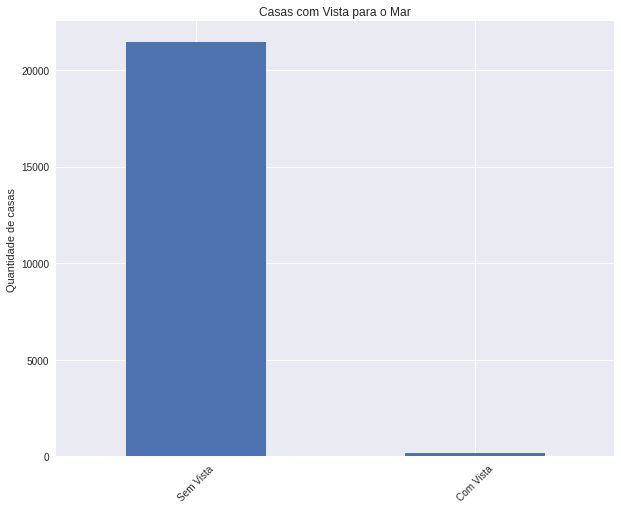

In [ ]:
#Hipotese 1: casa com vista para o mar são mais caras que as demais
ax = df_mbrito['waterfront'].value_counts().plot(kind='bar', 
                                                 figsize=(10,8)
                                                 )

ax.set_ylabel('Quantidade de casas')
ax.set_xticklabels(['Sem Vista', 'Com Vista'],rotation=45)
ax.set_title('Casas com Vista para o Mar')
plt.show()


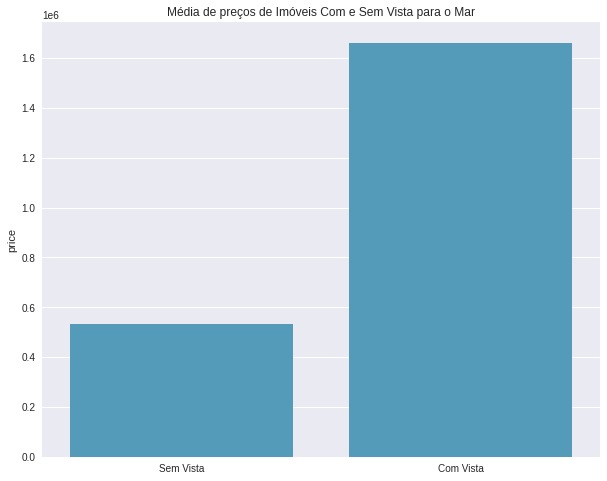

In [ ]:
#comparação com a média de preços dos imóveis
plt.figure(figsize=(10,8))
waterfront_price = df_mbrito.groupby('waterfront')['price'].mean().to_frame()
waterfront_price.index = ['Sem Vista', 'Com Vista']
sns.barplot(x=waterfront_price.index, y='price', 
            data=waterfront_price, 
            color='#43a2ca'
            )
plt.title('Média de preços de Imóveis Com e Sem Vista para o Mar')
plt.show()

In [ ]:
waterfront_price

,price
Sem Vista,5.315636e+05
Com Vista,1.661876e+06


De acordo com a média, como mostrado pelo gráfico acima, as propriedades com vista para o mar possuem um valor agregado muito mais elevado do que os imóveis sem essa característica.

Validando assim nossa primeira hipótese. 

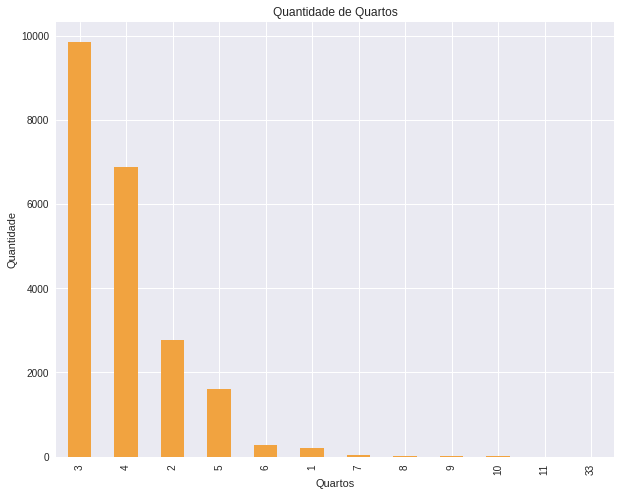

In [ ]:
#hipotese 2:Casas com o maior número de quartos são mais caras
df_mbrito['bedrooms'].value_counts().plot(kind='bar',
                                          figsize=(10,8),
                                          color='#f1a340')

plt.title('Quantidade de Quartos')
plt.ylabel('Quantidade')
plt.xlabel('Quartos')
plt.show()

As propriedades mais vendidas tem em média 3 a 4 quartos.

In [ ]:
bedrooms_price = df_mbrito.groupby('bedrooms')['price'].mean().to_frame().reset_index()
bedrooms_price['bedrooms'] = bedrooms_price['bedrooms'].astype('object')
bedrooms_price = bedrooms_price.sort_values('bedrooms', ascending=True)


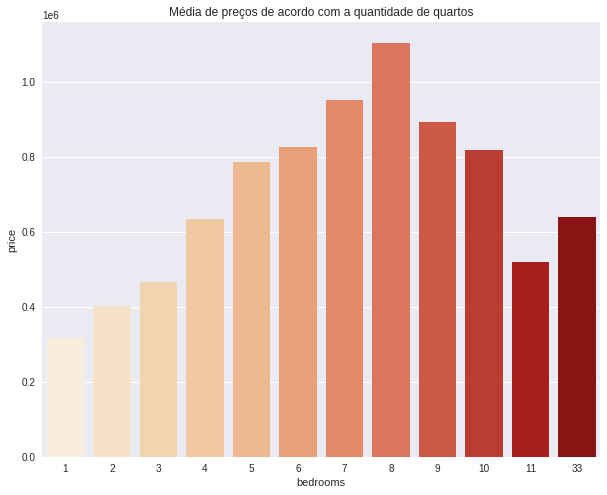

In [ ]:
plt.figure(figsize=(10,8))
sns.barplot(x=bedrooms_price.bedrooms, y='price', 
            data=bedrooms_price, 
            palette='OrRd'
            )
plt.title('Média de preços de acordo com a quantidade de quartos')
plt.show()

De acordo com o gráfico, o valor dos imóveis tem uma tendência de crescimento linear com o aumento da quantidade de quartos, tendo a média de preços mais elevada os imóveis com até 8 quartos, a partir dessa quantidade o valor decresce até chegar ao imóvel de 33 quartos, que deve ser um outlier, onde ocorre um acrêscimo do valor, mas não alcançando o valor máximo. 

Essa tendência deve ser explicada pela baixa quantidade de amostra de imóveis com o número de quartos acima de oito. Logo, a hipotese pode ser verdadeira, mas de acordo com os dados atuais ela é parcialmente refutada. 

In [ ]:
#Qual o incremento no valor dos imóveis com a adição de um quarto?
#utilizando os dados agrupados da análise anterior e encontrando as diferenças
#Com a média encontramos o valor de incremento de um quarto.
#Vamos utilizar os valores do comportamento linear

diff_bed = []
for i in range(0,12):
  if i == 0:
    diff_bed.append(0)
  elif i <=6:
    diff_bed.append(np.subtract(bedrooms_price.price[i+1],bedrooms_price.price[i]))
  else:
    diff_bed.append(0)

bedrooms_price['diff_price'] = diff_bed

In [ ]:
bedrooms_mean = np.mean(bedrooms_price['diff_price'])
print('O incremento do valor ao adicionar um quarto no imóvel é de: R$ {}'.format(round(bedrooms_mean,2)))

O incremento do valor ao adicionar um quarto no imóvel é de: R$ 58642.02


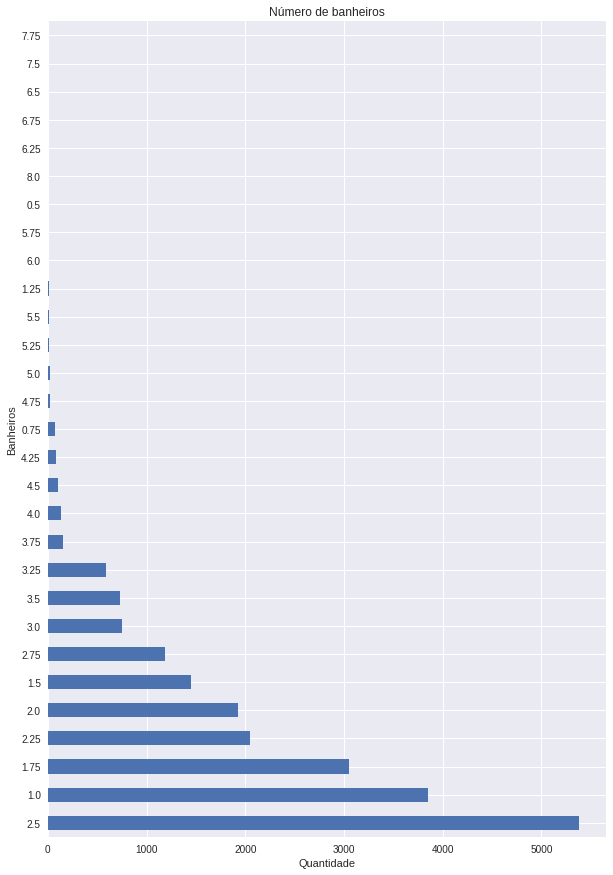

In [ ]:
#Hipotese 3: Casas com o maior número de banheiros são mais caras
df_mbrito['bathrooms'].value_counts().plot(kind='barh',
                                          figsize=(10,15))

plt.title('Número de banheiros')
plt.ylabel('Banheiros')
plt.xlabel('Quantidade')
plt.show()

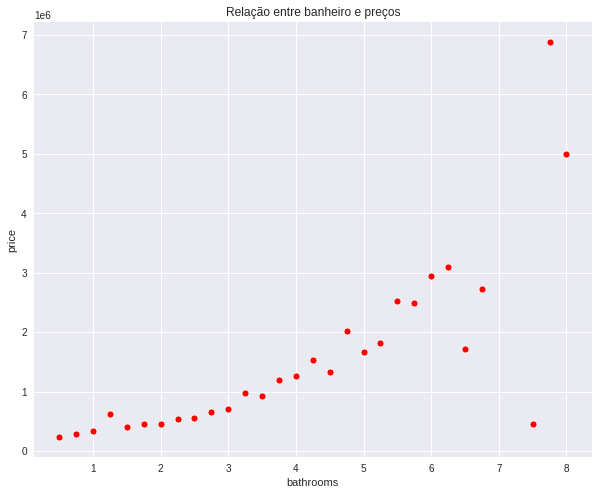

In [ ]:
bath_price = df_mbrito.groupby('bathrooms')['price'].mean().to_frame().reset_index()

plt.figure(figsize=(10,8))
sns.scatterplot(x='bathrooms', y='price', data=bath_price, color='red')
plt.title('Relação entre banheiro e preços')
plt.show()

Como a análise de quartos há uma tendência de crescimento quando relacionamos números de quartos e o valor do imóvel, ou seja, quanto mais banheiros, maior é o valor da propriedade. salvo casos outliers, que são as amostras com número de banheiro acima de 6. 

Logo a hipótese é validada. 

In [ ]:
#Qual o incremento no valor dos imóveis com a adição de um lavabo?
#utilizando os dados agrupados da análise anterior e encontrando as diferenças
#Com a média encontramos o valor de incremento de um lavabo.
#Vamos utilizar os valores do comportamento linear

diff_bath = []
for i in range(0,29):
  if i == 0:
    diff_bath.append(0)
  elif i <=23:
    diff_bath.append(np.subtract(bath_price.price[i+1],bath_price.price[i]))
  else:
    diff_bath.append(0)

bath_price['diff_bath'] = diff_bath

In [ ]:
bathrooms_mean = np.mean(bath_price['diff_bath'])
print('O incremento do valor ao adicionar um lavabo no imóvel é de: R$ {}'.format(round(bathrooms_mean,2)))

O incremento do valor ao adicionar um lavabo no imóvel é de: R$ 48790.49


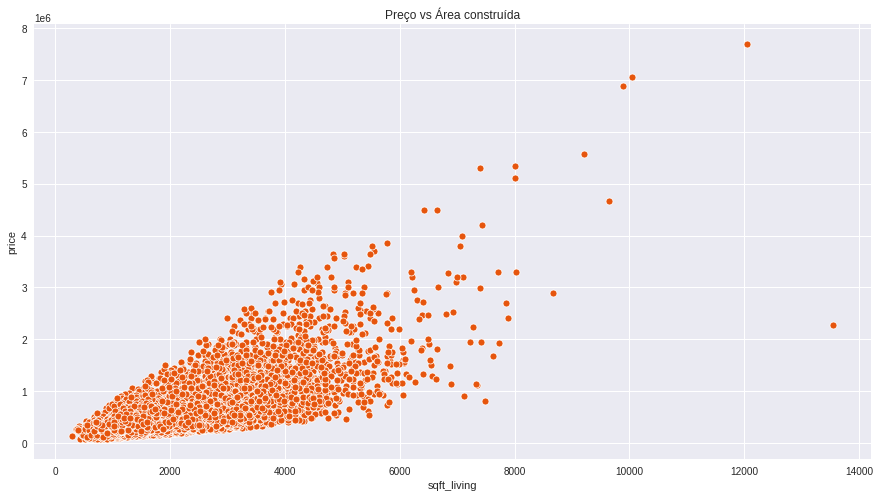

In [ ]:
#Hipotese 4:A área construída tem uma relação linear positiva com os valores dos imóveis
plt.figure(figsize=(15,8))
sns.scatterplot(x='sqft_living', y='price', 
                data=df_mbrito,
                color = '#e6550d')
plt.title('Preço vs Área construída')
plt.show()

A relação entre área construída e preço é linearmente positiva, confirmando a hipótese. Podemos visualizar que existe no dataset um valor outlier, que possui uma área construida extensa, mas não segue a tendência no seu valor.

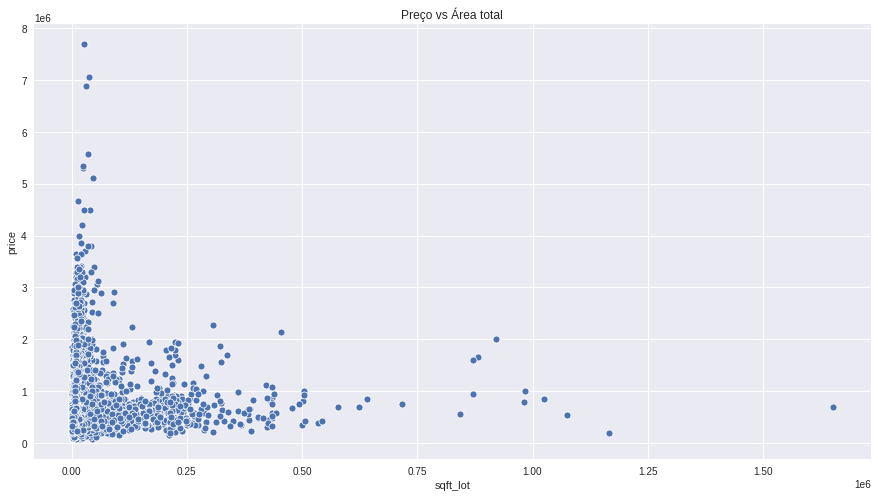

In [ ]:
#Hipotese 5:A área total tem uma relação linear positiva com os valores dos imóveis
plt.figure(figsize=(15,8))
sns.scatterplot(x='sqft_lot', y='price', data=df_mbrito)
plt.title('Preço vs Área total')
plt.show()

Já a relação entre a área do lote da propriedade e os valores não existe uma relação linear, ou seja a hipótese foi refutada. 

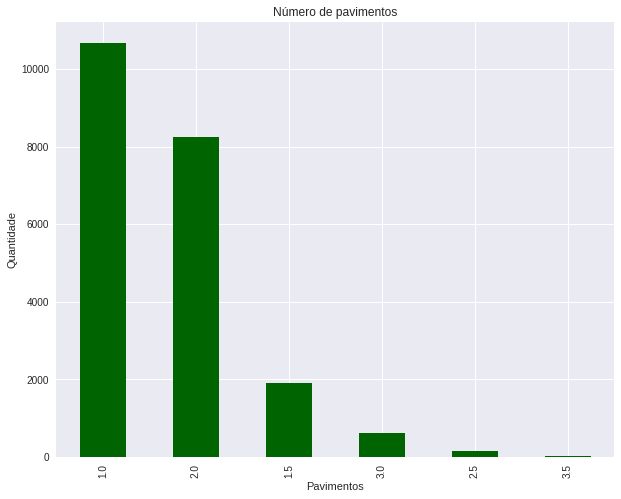

In [ ]:
#Hipotese 6: Qual o incremento no valor do imóvel ao construir um novo andar?
df_mbrito['floors'].value_counts().plot(kind='bar',
                                        figsize=(10,8),
                                        color='darkgreen')

plt.title('Número de pavimentos')
plt.ylabel('Quantidade')
plt.xlabel('Pavimentos')
plt.show()

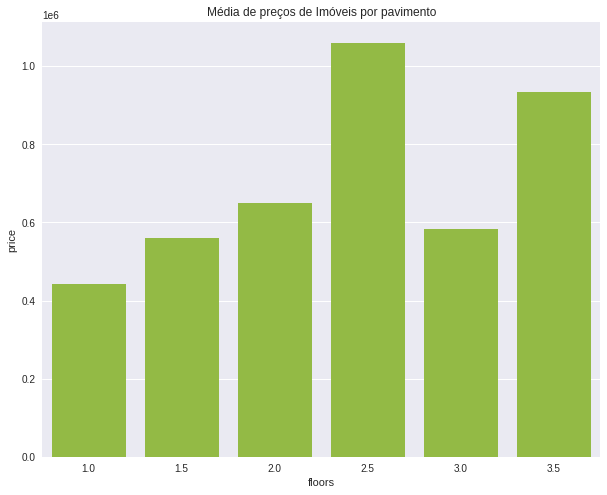

In [ ]:
#comparação com a média de preços dos imóveis
plt.figure(figsize=(10,8))
floors_price = df_mbrito.groupby('floors')['price'].mean().to_frame().reset_index()
sns.barplot(x='floors', y='price', 
            data=floors_price, 
            color='yellowgreen'
            )
plt.title('Média de preços de Imóveis por pavimento')
plt.show()

É possível verificar que imóveis acima de 2 pavimentos devem conter um porão, caso contrário o valor irá decrescer. 

In [ ]:
#Qual o incremento no valor dos imóveis com a adição de um novo pavimento?
#utilizando os dados agrupados da análise anterior e encontrando as diferenças
#Com a média encontramos o valor de incremento de um pavimento.


diff_floors = []
for i in range(0,6):
  if i <5:
    diff_floors.append(np.subtract(floors_price.price[i+1],floors_price.price[i]))
  else:
    diff_floors.append(0)
    

floors_price['diff_floors'] = diff_floors

In [ ]:
floors_mean = np.mean(floors_price['diff_floors'])
print('O incremento do valor ao adicionar um novo pavimento no imóvel é de: R$ {}'.format(round(floors_mean,2)))

O incremento do valor ao adicionar um novo pavimento no imóvel é de: R$ 81855.31


In [ ]:
d = [round(bedrooms_mean,2), round(bathrooms_mean,2), round(floors_mean,2)] 
df_reforma = pd.DataFrame({'Reform':['Bedrooms', 'Bathrooms', 'Floors'],
                           'Price':d}
                          )

In [ ]:
#tabela com todos os valores de uma reforma
df_reforma

,Reform,Price
0,Bedrooms,58642.02
1,Bathrooms,48790.49
2,Floors,81855.31


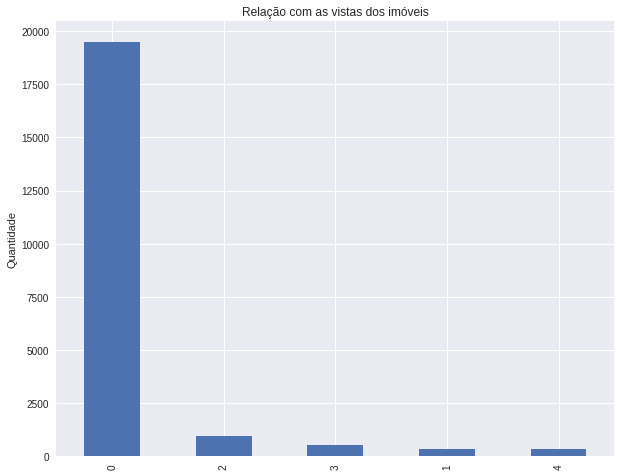

In [ ]:
#Hipótese 7: A qualidade da vista do imóvel influencia no valor de venda
df_mbrito['view'].value_counts().plot(kind='bar',
                                      figsize=(10,8)
                                      )

plt.title('Relação com as vistas dos imóveis')
plt.ylabel('Quantidade')
plt.show()

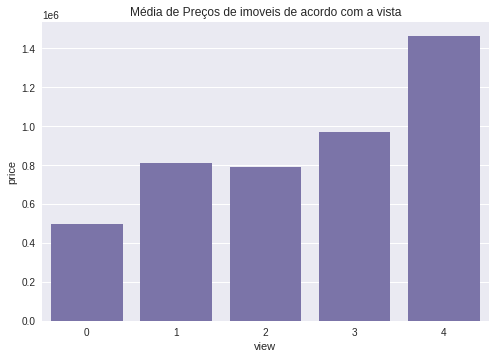

In [ ]:
view_price = df_mbrito.groupby('view')['price'].mean().to_frame()
sns.barplot(x=view_price.index, y='price', 
            data=view_price,
            color='#756bb1')

plt.title('Média de Preços de imoveis de acordo com a vista')
plt.show()

De acordo com o gráfico, com o aumento da qualidade da vista da propriedade o imóvel é mais valorizado. Sendo assim, a hipótese é validada.  

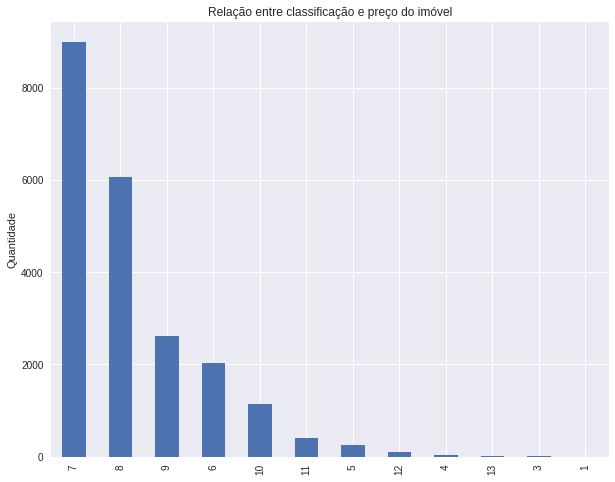

In [ ]:
#Hipótese 8: Casas com boa estrutura e com alta classificação são vendidas mais caras
df_mbrito['grade'].value_counts().plot(kind='bar', 
                                       figsize=(10,8)
                                       )
plt.title('Relação entre classificação e preço do imóvel')
plt.ylabel('Quantidade')
plt.show()

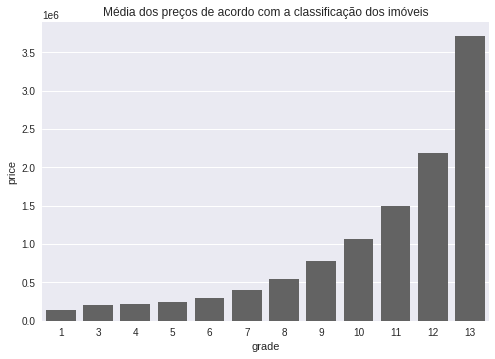

In [ ]:
grade_price = df_mbrito.groupby('grade')['price'].mean().to_frame()
sns.barplot(x=grade_price.index, y='price',
            data=grade_price,
            color='#636363')
plt.title('Média dos preços de acordo com a classificação dos imóveis')
plt.show()

De acordo com o gráfico, a tendência é de aumento do valor de acordo com a classificação da propriedade, validando assim a parte da hipótese. 

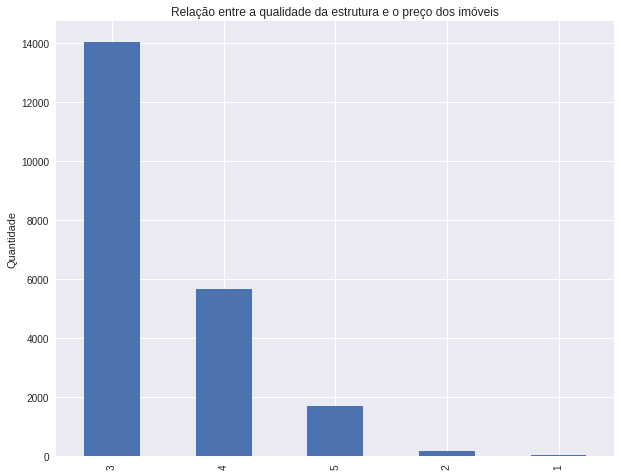

In [ ]:
df_mbrito['condition'].value_counts().plot(kind='bar', 
                                       figsize=(10,8)
                                       )
plt.title('Relação entre a qualidade da estrutura e o preço dos imóveis')
plt.ylabel('Quantidade')
plt.show()

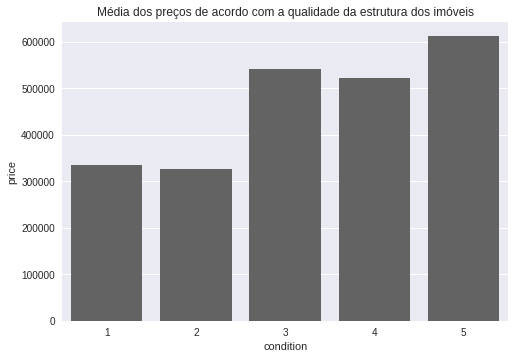

In [ ]:
condition_price = df_mbrito.groupby('condition')['price'].mean().to_frame()
sns.barplot(x=condition_price.index, y='price',
            data=condition_price,
            color='#636363')
plt.title('Média dos preços de acordo com a qualidade da estrutura dos imóveis')
plt.show()

De acordo com o gráfico de condições dos imóveis, a medida que a condição melhora há um aumento dos valores das propriedades. Completando assim a validação da hipótese.

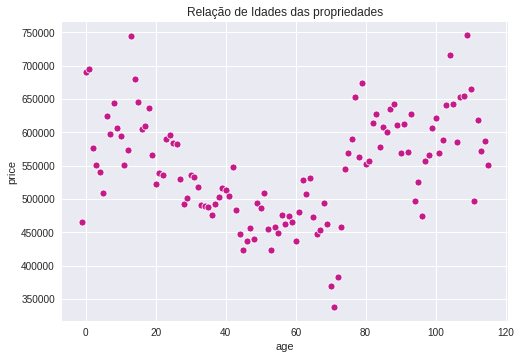

In [ ]:
#Hipótese 9: Ao passar do tempo a propriedade sofre uma valorização no seu valor
#Propriedades mais antigas acabam sendo mais valorizadas
age_price = df_mbrito.groupby('age')['price'].mean().to_frame()
sns.scatterplot(x=age_price.index,y='price',
                data=age_price,
                color ='#c51b8a')
plt.title('Relação de Idades das propriedades')
plt.show()

Conforme o gráfico acima, temos que os imóveis ao serem construídos estão bem valorizados, mas a medida que aumenta sua idade acaba desvalorizando, chegando a um patamar mínimo. No entanto, ao atingir uma certa idade o imóvel começa a sofrer uma valorização até chegar a valores próximos de quando novo.
Levando em consideração que o gráfico foi construído com imóveis distintos.

Logo a hipótese dos imóveis se valorizarem com o tempo é validada. 

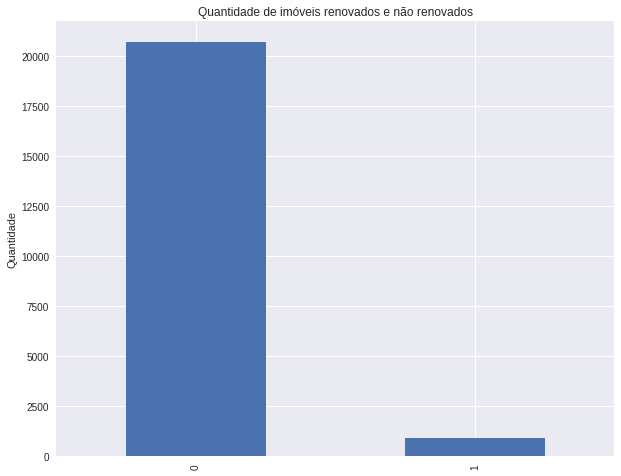

In [ ]:
#Hipótese 10: Se o imóvel for renovado o seu valor valoriza, mas com o passar do tempo há uma depreciação;
df_renovated = df_mbrito.loc[df_mbrito['renovated'] == 1]
df_mbrito['renovated'].value_counts().plot(kind='bar',
                                           figsize=(10,8)
                                           )
plt.title('Quantidade de imóveis renovados e não renovados')
plt.ylabel('Quantidade')
plt.show()

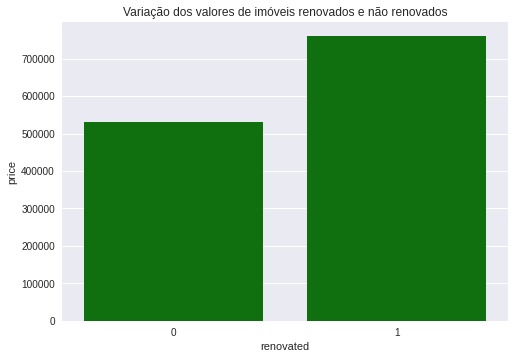

In [ ]:
renovated_price = df_mbrito.groupby('renovated')['price'].mean().to_frame()
sns.barplot(x=renovated_price.index,y='price',
            data=renovated_price,
            color='green'
            )
plt.title('Variação dos valores de imóveis renovados e não renovados')
plt.show()

Em comparação, os imóveis que são renovados tem uma média de preço mais elevada daqueles que não sofreram nenhuma alteração até a venda. 

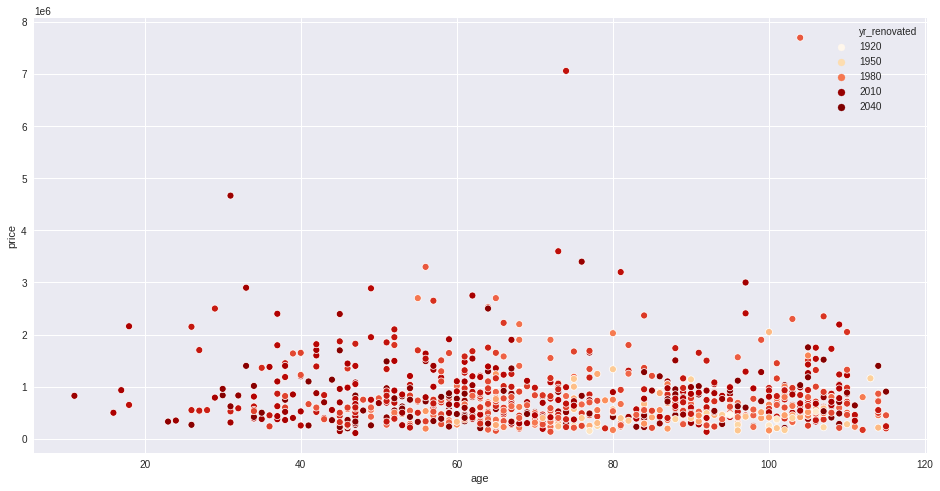

In [ ]:
plt.figure(figsize=(16,8))
sns.scatterplot(x='age', y='price',
                hue='yr_renovated',
                palette = 'OrRd', 
                data=df_renovated)

Verificando a hipótese podemos validar a primeira parte, que afirma que imóveis renovados tem uma média de preço mais elevada, no entanto a segunda parte não é validada, como pode ser visto no gráfico acima, que confirma que os preços variam sem relação com as idades dos imóveis.  

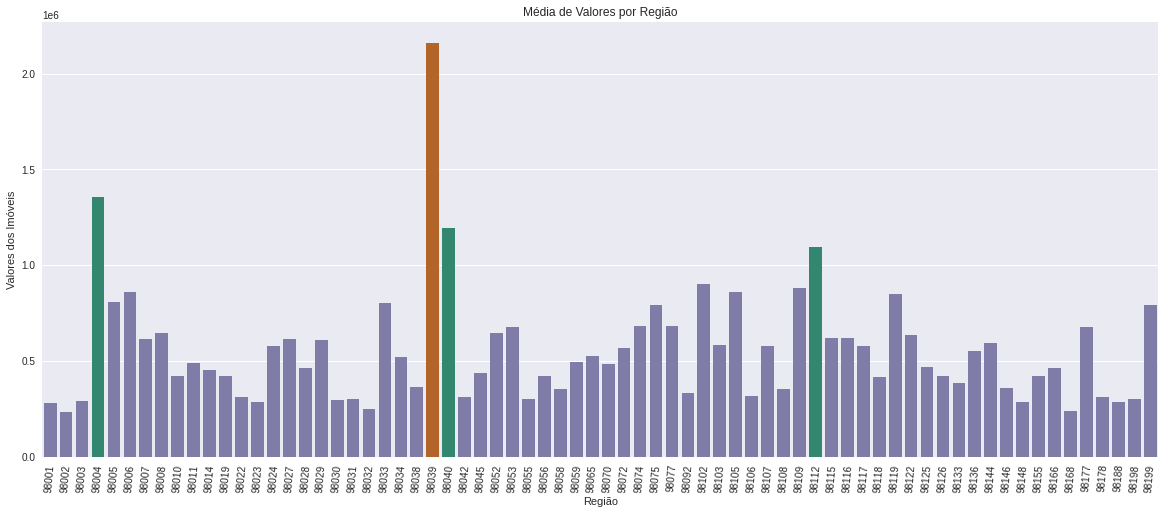

In [ ]:
#Hipótese 11: Existem regiões mais caras do que outras
zipcode_price = df_mbrito.groupby('zipcode')['price'].mean().to_frame()
plt.figure(figsize=(20,8))
#criação da lista com as cores para plotar o gráfico
colors_df = []
for i,j in zip(zipcode_price.index, zipcode_price.values):
  if j == zipcode_price.values.max():
    colors_df.append('#d95f02')
  elif (j>1000000) & (j<1500000):
    colors_df.append('#1b9e77')
  else:
    colors_df.append('#7570b3')
#plotando o gráfico
sns.barplot(x = zipcode_price.index, y='price',
            data=zipcode_price,
            palette=colors_df,
            saturation=0.65
            )
plt.title('Média de Valores por Região')
plt.xticks(rotation=85)
plt.xlabel('Região')
plt.ylabel('Valores dos Imóveis')
plt.show()

De acordo com o gráfico existem variações de preços para diferentes localidades. É possível verificar que a região de zipcode 98039 é a de maior valor agregado, e as regiões 98004, 98040 e 98112 tem uma média de preço entre 
1.000.000,00 dolares e 1.500.000,00 dolares. Portanto, a hipótese é validada. 

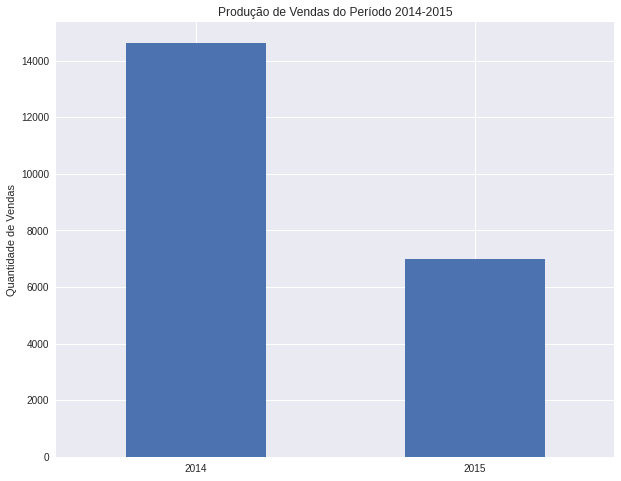

In [ ]:
#Hipótese 12:O ano de 2014 foi mais produtivo em relação ao ano de 2015
df_mbrito['year'].value_counts().plot(kind='bar',
                                      figsize=(10,8)
                                      )
plt.title('Produção de Vendas do Período 2014-2015')
plt.xticks(rotation=0)
plt.ylabel('Quantidade de Vendas')
plt.show()

Como pode ser visto pelo gráfico, o ano de 2014 teve uma maior quantidade de venda de imóveis em relação ao ano de 2015. 

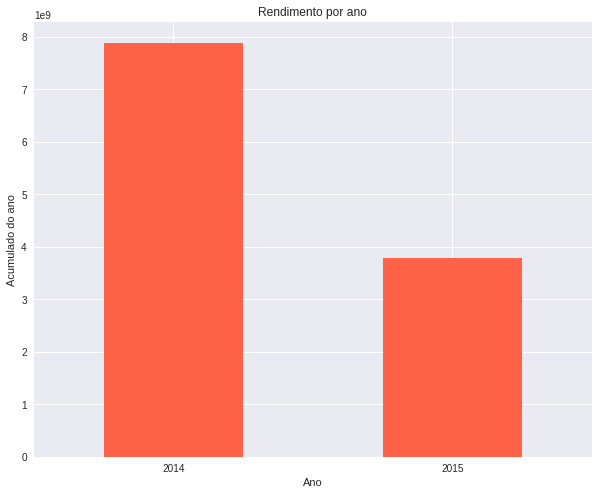

In [ ]:
df_mbrito.groupby('year')['price'].sum().plot(kind='bar',
                                              figsize=(10,8),
                                              color='tomato'
                                              )

plt.title('Rendimento por ano')
plt.xticks(rotation=0)
plt.ylabel('Acumulado do ano')
plt.xlabel('Ano')
plt.show()

O ano de 2014 foi muito mais rentável do que o de 2015, validando assim a hipótese.

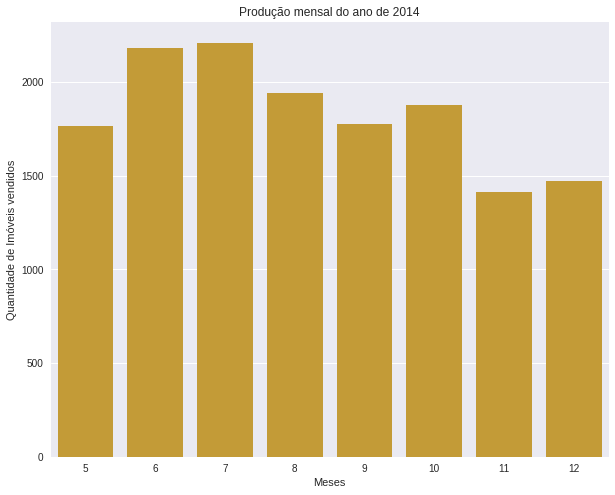

In [ ]:
#Hipótese 13:Existem periodos com maior número de venda de imóveis, como no final e no início do ano
#Analisando o ano de 2014 que teve o maior número de produção
df_2014 = df_mbrito.loc[df_mbrito['year']==2014]
plt.figure(figsize=(10,8))
sns.barplot(x=df_2014.month.value_counts().index,
            y=df_2014.month.value_counts().values,
            data=df_2014.month.value_counts().to_frame(),
            color='goldenrod'
            )
plt.title('Produção mensal do ano de 2014')
plt.ylabel('Quantidade de Imóveis vendidos')
plt.xlabel('Meses')
plt.show()

Os meses de maiores vendas são os meses de junho e julho, ou seja, no início do verão no hemisfério norte. Não há dados do início do ano de 2014.

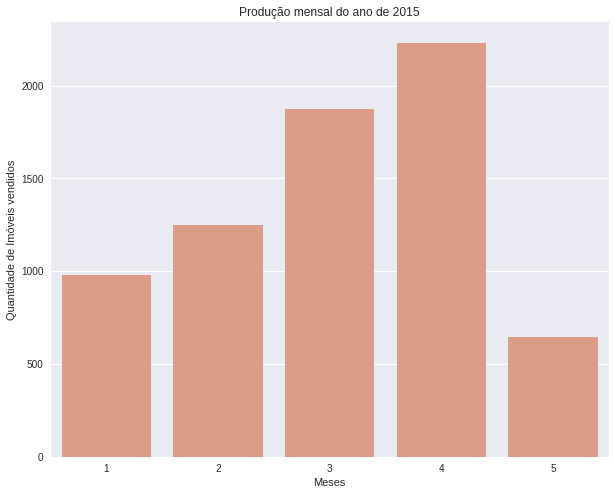

In [ ]:
#análise do primeiro semestre de 2015
df_2015 = df_mbrito.loc[df_mbrito['year']==2015]
plt.figure(figsize=(10,8))
sns.barplot(x=df_2015.month.value_counts().index,
            y=df_2015.month.value_counts().values,
            data=df_2015.month.value_counts().to_frame(),
            color='darksalmon'
            )
plt.title('Produção mensal do ano de 2015')
plt.ylabel('Quantidade de Imóveis vendidos')
plt.xlabel('Meses')
plt.show()

In [ ]:
#Hipótese 14:Em todas as revendas de imóveis houve lucro para o vendedor
df_mbrito['resale'].value_counts()

0    21436
1      177
Name: resale, dtype: int64

In [ ]:
#criando a lista de imóveis revendidos
resale = resale.to_list()
resale

[6021501535,
 4139480200,
 7520000520,
 3969300030,
 2231500030,
 8820903380,
 726049190,
 8682262400,
 9834200885,
 8062900070,
 1231000510,
 6117501820,
 2228900270,
 3630120700,
 7888000390,
 2143700830,
 3395040550,
 4345000510,
 9407110710,
 1000102,
 1781500435,
 1232000810,
 7856400240,
 7983000200,
 9136103130,
 5083000375,
 7409700215,
 1823049202,
 2767602141,
 1254200015,
 723049156,
 4435000705,
 4364700600,
 1825069031,
 3262300940,
 9353300600,
 1524079093,
 9809000020,
 3303000130,
 7524400250,
 4204400098,
 6632900574,
 2726049071,
 3578401060,
 1788800630,
 6381500170,
 1954420170,
 1545800290,
 9828200460,
 9222400605,
 8832900780,
 8645530010,
 3323059027,
 5417600130,
 8651510380,
 5249801440,
 526059224,
 1446403850,
 251300110,
 4139420590,
 2621600015,
 2206700215,
 2787460720,
 3883800011,
 4154300296,
 1721801010,
 1237500540,
 5101405604,
 5127001320,
 5282200015,
 7977201065,
 3739500096,
 1568100300,
 1922059278,
 302000375,
 722039087,
 8129700644,
 4443800

In [ ]:
# criando o dataframe com imóveis revendidos
for i in range(0,177):
  if i == 0:
    df0 = df_mbrito.loc[df_mbrito['id'] == resale[0]]
    df_resale = df0
  else:
    df1 = df_mbrito.loc[df_mbrito['id'] == resale[i]]
    df_resale = df_resale.append(df1) 

In [ ]:
df_resale = df_resale.reset_index() #Resetando o index do dataframe


In [ ]:
df_resale['id'].value_counts() #Foi identificado que dois id's repetiam mais de duas vezes

795000620     6
8651402750    2
5536100020    2
9238500040    2
1995200200    2
             ..
8062900070    2
4139440480    2
2568300045    2
2143700830    2
2023049218    2
Name: id, Length: 176, dtype: int64

In [ ]:
#Verificando as linhas com mais de duas aparições
#O id abaixo teve 6 aparições sendo 3 repetidas
#Esse imóvel foi revendido mais de uma vez
df_resale.loc[df_resale['id'] == 795000620]

,index,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month,resale,age
316,17602,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2014,9,0,64
317,17603,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2014,12,1,64
318,17604,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2015,3,1,65
319,17602,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2014,9,0,64
320,17603,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2014,12,1,64
321,17604,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2015,3,1,65


In [ ]:
#Dropando as linhas repetidas 
df_resale = df_resale.drop(index=[316,317,318], axis=0)
df_resale = df_resale.reset_index() #Resetando novamente o index do dataframe
df_resale = df_resale.drop(['level_0','index'], axis=1)

In [ ]:
df_resale_plus = df_resale.loc[df_resale['id'] == 795000620]
df_resale_plus

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month,resale,age
316,795000620,2014-09-24,115000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2014,9,0,64
317,795000620,2014-12-15,124000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2014,12,1,64
318,795000620,2015-03-11,157000.0,3,1.0,1080,6250,1.0,0,0,2,5,1080,0,1950,0,98168,47.5045,-122.33,1070,6250,0,2015,3,1,65


In [ ]:
df_resale = df_resale.drop(index=[316,317,318], axis=0)
df_resale = df_resale.reset_index() #Resetando novamente o index do dataframe
df_resale = df_resale.drop('index', axis=1)

In [ ]:
df_resale.shape

(350, 26)

In [ ]:
diff_resale = []
for i in range(0,349):
  if (i % 2) == 0:
    diff_resale.append(np.subtract(df_resale.price[i+1],df_resale.price[i]))
  else:
    diff_resale.append(0)

diff_resale = diff_resale + [0] 

df_resale['profit'] = diff_resale 

In [ ]:
df_resale.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,year,month,resale,age,profit
0,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,0,2014,7,0,75,270000.0
1,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,3,8,1290,290,1939,0,98117,47.6870,-122.386,1570,4500,0,2014,12,1,75,0.0
2,4139480200,2014-06-18,1384000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,0,2014,6,0,17,16000.0
3,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,3,3,11,2690,1600,1997,0,98006,47.5503,-122.102,3860,11244,0,2014,12,1,17,0.0
4,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,3,6,960,280,1922,1984,98146,47.4957,-122.352,1820,7460,1,2014,9,0,92,8500.0


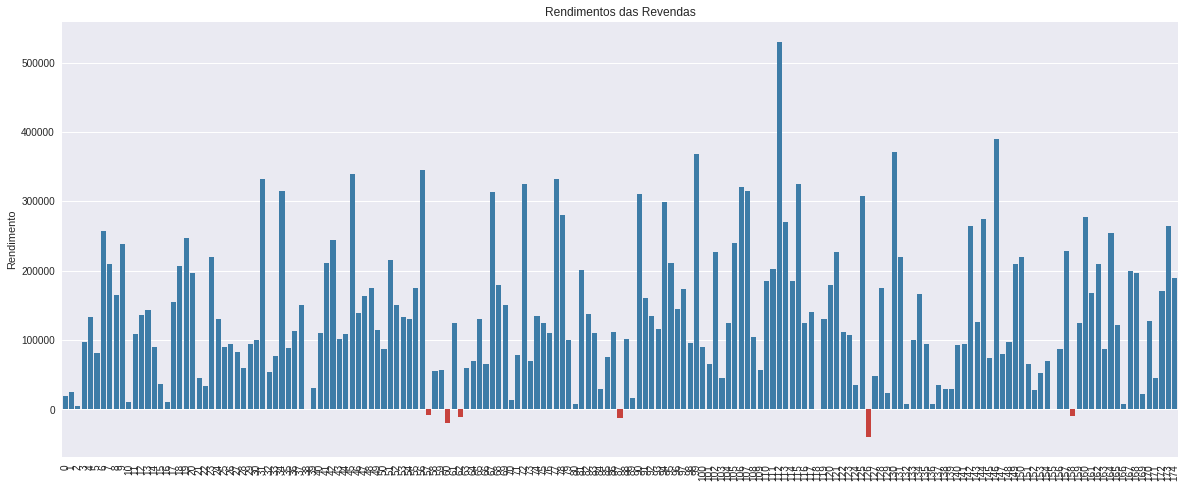

In [ ]:
id_profit = df_resale.groupby('id')['profit'].sum().to_frame().reset_index()

colors_df = []
for i in id_profit.profit.values:
  if i < 0:
    colors_df.append('#de2d26')
  else:
    colors_df.append('#2c7fb8')

plt.figure(figsize=(20,8))
sns.barplot(x=id_profit.index, y='profit',
            data=id_profit,
            palette = colors_df
            )

plt.title('Rendimentos das Revendas')
plt.xticks(rotation=90)
plt.ylabel('Rendimento')
plt.show()

De acordo com o gráfico acima existiram alguns négocios que trouxeram prejuizos para os vendedores, nenhum desses imóveis sofreram alterações na sua estrutura e foram de diferentes regiões, e por falta de dados não é possivel concluir por qual motivo houve essa depreciação. Logo, a hipótese é refutada.

In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('bedrooms')['price'].count().to_frame() #maioria das casas com altos rendimentos tinham três quartos

#A escolha ideal seria imóveis com 2 a 3 quartos 

,price
bedrooms,
1,1
2,6
3,22
4,6
5,4
6,5


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('bathrooms')['price'].count().to_frame()

#Imóveis com 2 a 1.75 banheiros

,price
bathrooms,
1.00,11
1.50,6
1.75,7
2.00,6
2.25,6
2.50,5
3.00,2
4.50,1


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('sqft_living')['price'].count().to_frame()
#propriedades com sqft_living entre 850 a 1950

,price
sqft_living,
850,1
930,1
960,1
1080,1
1090,1
1320,1
1370,1
1380,1
1430,1


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('sqft_lot')['price'].count().to_frame()
#De 3800 a 5000

,price
sqft_lot,
3800,2
3876,1
4000,1
4013,1
4080,1
4350,1
4590,1
5000,3
5030,1


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('floors')['price'].count().to_frame()
#Com 1 andar a 1.5

,price
floors,
1.0,28
1.5,10
2.0,6


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('waterfront')['price'].count().to_frame()
#Sem vista para o mar

,price
waterfront,
0,44


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('view')['price'].count().to_frame()
#Casas mais no centro urbano sem paisagem

,price
view,
0,44


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('condition')['price'].count().to_frame()
#condição da estrutura 3

,price
condition,
1,1
2,3
3,29
4,5
5,6


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('grade')['price'].count().to_frame()
#classificação 7

,price
grade,
5,1
6,7
7,27
8,7
9,2


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('sqft_basement')['price'].count().to_frame()
# Sem porão

,price
sqft_basement,
0,17
250,2
260,1
290,2
310,2
360,1
430,1
450,2
490,1


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('yr_built')['price'].count().to_frame()
#casas mais antigas, antes da década 70.

,price
yr_built,
1900,1
1904,1
1906,1
1910,2
1911,1
1912,1
1913,1
1926,3
1931,1


In [ ]:
df_resale.loc[df_resale['profit'] > 200000].groupby('zipcode')['price'].count().to_frame()
#98118,98074,98115,98117

,price
zipcode,
98004,1
98006,1
98007,1
98011,1
98034,2
98074,4
98103,1
98106,2
98115,4


**Correlação entre os Preços e as demais Variáveis**

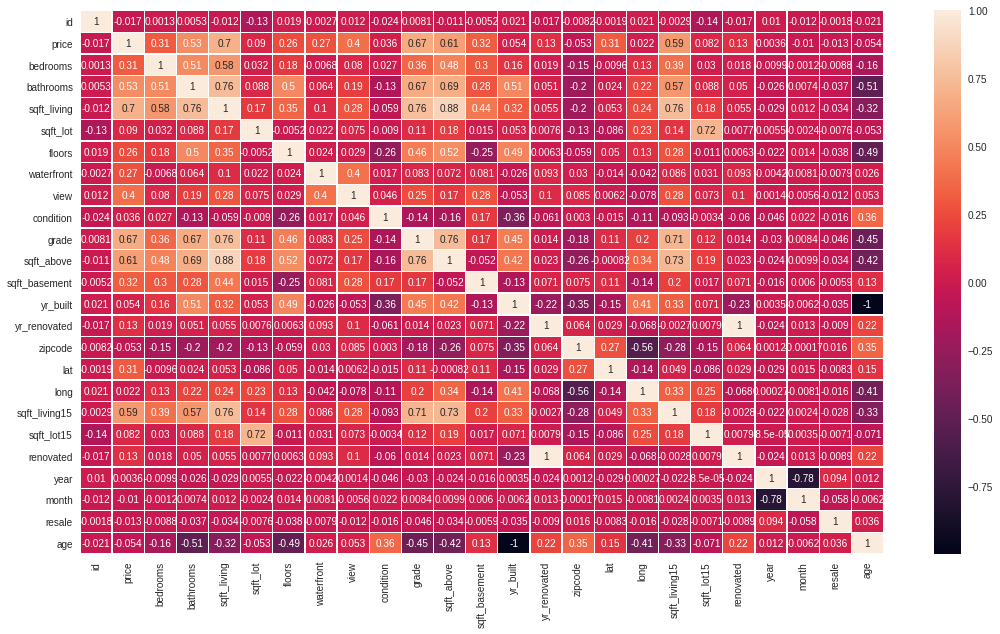

In [ ]:
plt.figure(figsize=(18,10))
sns.heatmap(data = df_mbrito.corr(), annot=True, linewidths=0.3, linecolor= 'white')

Através do mapa de calor de correlações, podemos afirmar que as variáveis que mais influenciam no preço do imóvel são bathrooms, sqft_living, grade, sqft_above e sqft_living15.

A variável de bedrooms sofre influencia da área construída e da quantidade de banheiros, que aumenta em consequência ao números de quartos.

Os banheiros além de influenciarem no valor do preço e da área construída, temos a correlação com área construída acima do solo, por não ser usual construir um banheiro no subsolo, que na maioria das vezes é utilizado como deposito ou garagem.

A área construída tem grande correlação com a classificação do imóvel. 

O número de pavimentos de uma propriedade está relacionado a idade que o imóvel foi construído, porque ao passar do tempo as cidades foram se verticalizando, consequentemente imóveis mais novos tem os maiores números de andares. 



Text(0.5, 1.0, 'Correlações que influenciam a variável Preço')

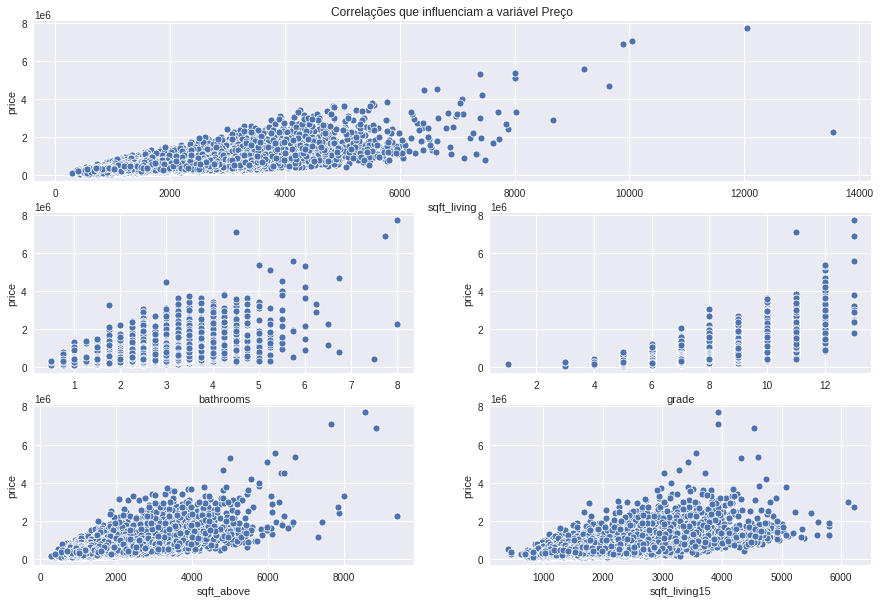

In [ ]:
fig = plt.figure(figsize=(15,10))

ax0 = fig.add_subplot(3,2,3)
ax1 = fig.add_subplot(3,2,4)
ax2 = fig.add_subplot(3,2,5)
ax3 = fig.add_subplot(3,2,6)
ax4 = fig.add_subplot(3,1,1)

sns.scatterplot(x='bathrooms', y='price',
                data=df_mbrito,
                ax=ax0
                )

sns.scatterplot(x='grade', y='price',
                data=df_mbrito,
                ax=ax1
                )

sns.scatterplot(x='sqft_above', y='price',
                data=df_mbrito,
                ax=ax2
                )

sns.scatterplot(x='sqft_living15', y='price',
                data=df_mbrito,
                ax=ax3
                )

sns.scatterplot(x='sqft_living', y='price',
                data=df_mbrito,
                ax=ax4
                )

ax4.set_title('Correlações que influenciam a variável Preço')

### Soluções do Problema

**1) Solução para a primeira questão:**

De acordo com a análise, se a imobiliária busca alto rendimentos acima de 200000,00 reais, as características desse imóvel deve seguir aos critérios abaixo.

* Imóveis com 2 a 3 quartos;
* Imóveis com 2 a 1.75 banheiros;
* Propriedades com área construída de 850 sq ft à 1950 sq ft;
* A área do terreno deve ficar entre 3800 sq ft à 5000 sq ft;
* Imóveis com 1 andar à 1.5;
* Imóveis sem vista para o mar, localizados mais nos centros urbanos;
* Condições estruturais nivel 3 e classificação nivel 7;
* Propriedades mais antigas antes da década de 70, sem porão;
* E localizadas principalmente nas regiões 98118, 98074, 98115, 98117;

Os imóveis que melhor se adequem tem uma maior probabilidade de render acima de 200000 reais na revenda, portanto são uma grande oportunidade de negócio.

**2) Solução para a segunda questão:**

Os melhores meses de venda são aqueles que se encontram no período do verão, ou no começo da primavera, ou seja nos meses de Março, Abril, Junho e Julho.

O valor de revenda ficaria entre 200000 e 300000 acima do preço de compra do imóvel, para uma análise mais precisa, faz se necessário realizar uma modelagem preditiva para encontrar os valores ideais. 



**3) Solução para a última questão:**

Analisando cada estrutura individualmente e levando em consideração as características ideais das melhores oportunidades de negócio, temos que a reforma é viável no caso da aquisição de um imóvel com um número menor de quartos ou de banheiros. Já a adição de um novo pavimento fica inviável economicamente. 

Os custos da reforma para adicionar um novo quarto na propriedade é de 58642,02 e de um banheiro é de 48790,49.

Comprando um imóvel com um quarto ou banheiro a menos, realizando a reforma e revendendo a Mbrito sairá com uma margem maior de lucro. 